In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Selecting relevant features for clustering

In [22]:
features = df[['Receiving_sum_Yds', 'Defense_sum_Yds', 'Recieveing_sum_TD']].dropna()

#### Scaling the features

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Add cluster info to the DataFrame

In [25]:
df['KMeans_Cluster'] = kmeans_clusters

#### Detailed Insights and Tailored Recommendations

In [26]:
print("Detailed K-Means Clustering Insights and Tailored Recommendations:")
for cluster_num in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster_num]
    avg_receiving_yards = cluster_data['Receiving_sum_Yds'].mean()
    avg_defense_yards = cluster_data['Defense_sum_Yds'].mean()
    avg_touchdowns = cluster_data['Recieveing_sum_TD'].mean()

    print(f"\nCluster {cluster_num} Insights:")
    print(f"  - Average Receiving Yards: {avg_receiving_yards:.2f}")
    print(f"  - Average Defensive Yards: {avg_defense_yards:.2f}")
    print(f"  - Average Receiving Touchdowns: {avg_touchdowns:.2f}")

    print(f"Tailored Recommendations for Cluster {cluster_num}:")
    if avg_receiving_yards > 3000:
        print("  - Maintain strong offensive strategies; explore options to enhance defense.")
    elif avg_defense_yards > 200:
        print("  - Defensive improvements needed; consider defensive coaching and player development.")
    else:
        print("  - Balanced approach required; focus on both offense and defense.")


Detailed K-Means Clustering Insights and Tailored Recommendations:

Cluster 0 Insights:
  - Average Receiving Yards: 2757.71
  - Average Defensive Yards: 272.54
  - Average Receiving Touchdowns: 18.89
Tailored Recommendations for Cluster 0:
  - Defensive improvements needed; consider defensive coaching and player development.

Cluster 1 Insights:
  - Average Receiving Yards: 3752.83
  - Average Defensive Yards: 159.55
  - Average Receiving Touchdowns: 31.31
Tailored Recommendations for Cluster 1:
  - Maintain strong offensive strategies; explore options to enhance defense.

Cluster 2 Insights:
  - Average Receiving Yards: 2430.37
  - Average Defensive Yards: 106.28
  - Average Receiving Touchdowns: 15.28
Tailored Recommendations for Cluster 2:
  - Balanced approach required; focus on both offense and defense.


#### Visualization of K-Means Clusters

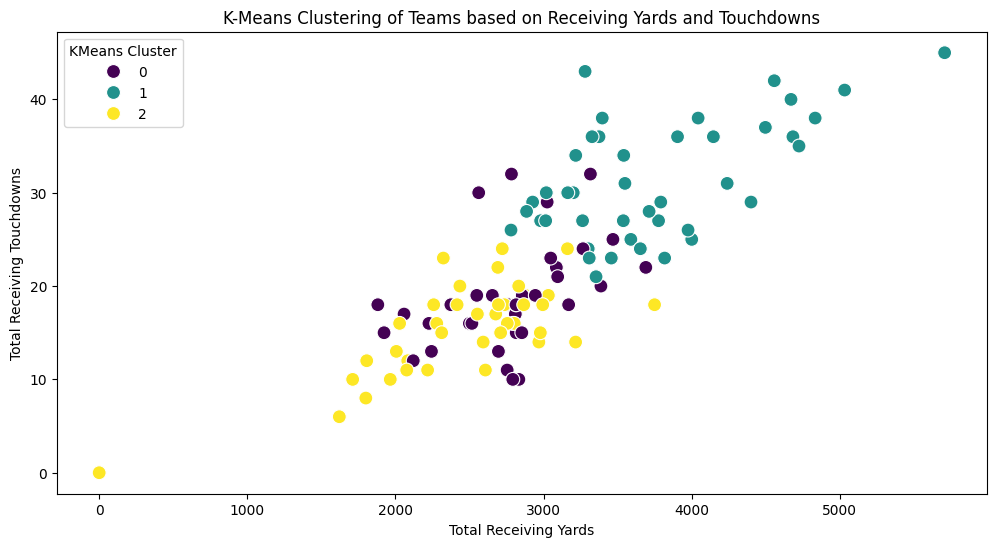

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Receiving_sum_Yds', y='Recieveing_sum_TD', hue='KMeans_Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of Teams based on Receiving Yards and Touchdowns')
plt.xlabel('Total Receiving Yards')
plt.ylabel('Total Receiving Touchdowns')
plt.legend(title='KMeans Cluster')
plt.show()


In [28]:
# Assuming 'Team_Name', 'Year', and 'KMeans_Cluster' are the columns in 'df'

# Function to display teams in a cluster along with their years
def display_teams_in_cluster_kmeans(cluster_number):
    cluster_teams = df[df['KMeans_Cluster'] == cluster_number][['Year', 'Team']]
    print(f"Teams in K-Means Cluster {cluster_number}:")
    for _, row in cluster_teams.iterrows():
        print(f"{row['Year']} - {row['Team']}")

# Display teams in Cluster 0 for K-Means Clustering
display_teams_in_cluster_kmeans(0)

# Line break for readability
print("\n")

# Display teams in Cluster 1 for K-Means Clustering
display_teams_in_cluster_kmeans(1)

# Line break for readability
print("\n")

# Display teams in Cluster 2 for K-Means Clustering
display_teams_in_cluster_kmeans(2)


Teams in K-Means Cluster 0:
2017 - ARIZ
2013 - ARIZ
2018 - AZST
2016 - AZST
2014 - AZST
2013 - AZST
2012 - AZST
2009 - AZST
2018 - CAL
2017 - CAL
2011 - CAL
2016 - COL
2015 - COL
2013 - COL
2017 - ORE
2012 - ORE
2011 - ORE
2012 - ORST
2016 - STAN
2012 - STAN
2016 - UCLA
2014 - UCLA
2013 - UCLA
2009 - UCLA
2015 - USC
2009 - USC
2018 - UTAH
2015 - UTAH
2011 - UTAH
2010 - UTAH
2009 - UTAH
2015 - WASH
2014 - WASH
2013 - WASH
2012 - WASH


Teams in K-Means Cluster 1:
2018 - ARIZ
2015 - ARIZ
2014 - ARIZ
2012 - ARIZ
2011 - ARIZ
2010 - ARIZ
2015 - AZST
2011 - AZST
2010 - AZST
2016 - CAL
2015 - CAL
2014 - CAL
2018 - ORE
2016 - ORE
2015 - ORE
2014 - ORE
2013 - ORE
2010 - ORE
2013 - ORST
2009 - ORST
2018 - STAN
2011 - STAN
2010 - STAN
2017 - UCLA
2015 - UCLA
2012 - UCLA
2017 - USC
2016 - USC
2014 - USC
2012 - USC
2011 - USC
2010 - USC
2016 - WASH
2011 - WASH
2018 - WAU
2017 - WAU
2016 - WAU
2015 - WAU
2014 - WAU
2013 - WAU
2012 - WAU
2011 - WAU


Teams in K-Means Cluster 2:
2016 - ARIZ
2009 - ARI

#### 2nd Algorithim Hierarchical Clustering

Agglomerative Clustering Silhouette Score: 0.2838946455938724

Detailed Agglomerative Clustering Insights and Tailored Recommendations:

Cluster 0 Insights:
  - Average Receiving Yards: 3626.30
  - Average Defensive Yards: 188.44
  - Average Receiving Touchdowns: 30.66
  - Maintain and enhance offensive strategies.

Cluster 1 Insights:
  - Average Receiving Yards: 2414.89
  - Average Defensive Yards: 71.48
  - Average Receiving Touchdowns: 14.59
  - Seek balance in team development; both offense and defense require attention.

Cluster 2 Insights:
  - Average Receiving Yards: 2607.63
  - Average Defensive Yards: 219.95
  - Average Receiving Touchdowns: 16.42
  - Focus on defensive training and strategy improvements.


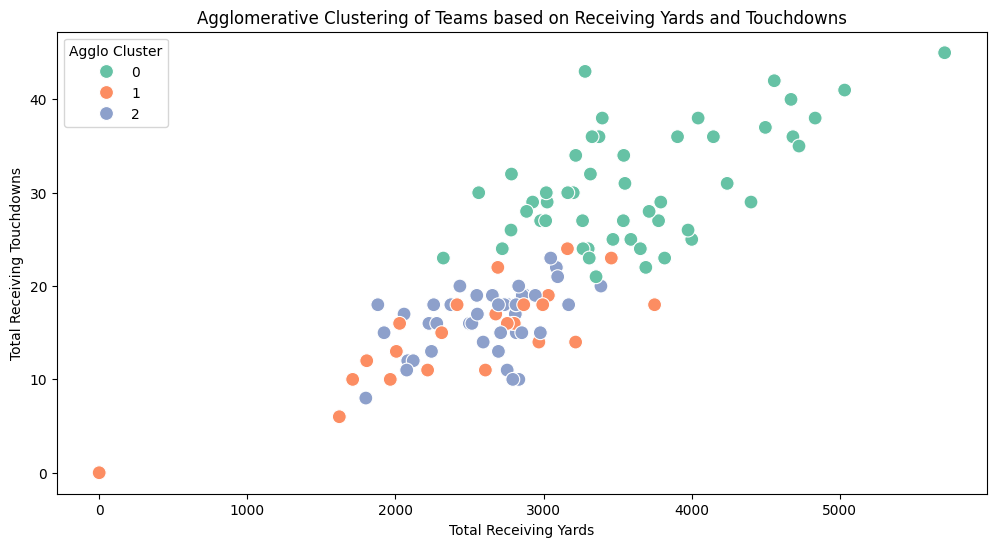

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering (Agglomerative Clustering)
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_clusters = agglo.fit_predict(scaled_features)
# Add Agglomerative Clustering info to the DataFrame
df['Agglo_Cluster'] = agglo_clusters

# Calculate silhouette score for Agglomerative Clustering to evaluate clustering
agglo_silhouette_avg = silhouette_score(scaled_features, agglo_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette_avg}\n')

# Detailed Insights and Tailored Recommendations for Agglomerative Clustering
print("Detailed Agglomerative Clustering Insights and Tailored Recommendations:")
for cluster_num in sorted(df['Agglo_Cluster'].unique()):
    cluster_data = df[df['Agglo_Cluster'] == cluster_num]
    avg_receiving_yards = cluster_data['Receiving_sum_Yds'].mean()
    avg_defense_yards = cluster_data['Defense_sum_Yds'].mean()
    avg_touchdowns = cluster_data['Recieveing_sum_TD'].mean()

    print(f"\nCluster {cluster_num} Insights:")
    print(f"  - Average Receiving Yards: {avg_receiving_yards:.2f}")
    print(f"  - Average Defensive Yards: {avg_defense_yards:.2f}")
    print(f"  - Average Receiving Touchdowns: {avg_touchdowns:.2f}")

    if avg_receiving_yards > 3000:
        print("  - Maintain and enhance offensive strategies.")
    elif avg_defense_yards > 200:
        print("  - Focus on defensive training and strategy improvements.")
    else:
        print("  - Seek balance in team development; both offense and defense require attention.")

# Visualization of Agglomerative Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Receiving_sum_Yds', y='Recieveing_sum_TD', hue='Agglo_Cluster', data=df, palette='Set2', s=100)
plt.title('Agglomerative Clustering of Teams based on Receiving Yards and Touchdowns')
plt.xlabel('Total Receiving Yards')
plt.ylabel('Total Receiving Touchdowns')
plt.legend(title='Agglo Cluster')
plt.show()


In [30]:

def display_teams_in_cluster(cluster_number):
    cluster_teams = df[df['Agglo_Cluster'] == cluster_number][['Year', 'Team']]
    print(f"Teams in Cluster {cluster_number}:")
    for _, row in cluster_teams.iterrows():
        print(f"{row['Year']} - {row['Team']}")

# Display teams in Cluster 0
display_teams_in_cluster(0)

# Line break for readability
print("\n")

# Display teams in Cluster 1
display_teams_in_cluster(1)

# Line break for readability
print("\n")

# Display teams in Cluster 2
display_teams_in_cluster(2)


Teams in Cluster 0:
2018 - ARIZ
2015 - ARIZ
2014 - ARIZ
2012 - ARIZ
2011 - ARIZ
2010 - ARIZ
2015 - AZST
2014 - AZST
2013 - AZST
2012 - AZST
2011 - AZST
2010 - AZST
2016 - CAL
2015 - CAL
2014 - CAL
2018 - ORE
2016 - ORE
2015 - ORE
2014 - ORE
2013 - ORE
2012 - ORE
2011 - ORE
2010 - ORE
2013 - ORST
2012 - ORST
2018 - STAN
2017 - STAN
2015 - STAN
2011 - STAN
2010 - STAN
2017 - UCLA
2015 - UCLA
2012 - UCLA
2017 - USC
2016 - USC
2015 - USC
2014 - USC
2012 - USC
2011 - USC
2010 - USC
2016 - WASH
2011 - WASH
2018 - WAU
2017 - WAU
2016 - WAU
2015 - WAU
2014 - WAU
2013 - WAU
2012 - WAU
2011 - WAU


Teams in Cluster 1:
2016 - ARIZ
2017 - AZST
2013 - CAL
2010 - CAL
2018 - COL
2017 - COL
2014 - COL
2012 - COL
2011 - COL
2010 - COL
2009 - COL
2018 - ORST
2017 - ORST
2015 - ORST
2014 - ORST
2011 - ORST
2010 - ORST
2009 - ORST
2014 - STAN
2018 - UCLA
2010 - UCLA
2018 - USC
2013 - UTAH
2012 - UTAH
2018 - WASH
2010 - WASH
2010 - WAU


Teams in Cluster 2:
2017 - ARIZ
2013 - ARIZ
2009 - ARIZ
2018 - AZST
2